In [35]:
using LinearAlgebra
using Plots

Tylko przygotowujemy dane do obliczeń.

In [36]:
A = [1 2; 2 4]
x = [1;2]
b = A*x

2-element Array{Int64,1}:
  5
 10

Algorytm najszybszego spadku.

Procedura:

1. Wyznaczamy gradient (kierunek najszybszego wzrostu): $r_k = b - Ax_k$
2. Metodą rzutowania wyznacz przybliżone rozwiązanie w zredukowanym wymiarze (obliczamy współczynnik ak) $a_k = r_k^Tr_k / (r_k^TAr_k)$
3. Obliczamy nową poprawioną wartość $x_{k+1} = x_k + a_k * r_k$

In [37]:
function stepesc_descent(A,b,x0)
    R = Array{Float64}(undef,0)
    xk = x0
    rk = b-A*x0
    maxiter = 100
    iter = 1
    
    while ((norm(rk) > 1e-5) && (iter < maxiter))
        ak = rk'*rk / (rk'*A*rk)        
        xk = xk + ak*rk
        rk = b - A*xk
        push!(R, norm(rk))
        iter += 1
    end
    
    return xk, iter,R
end

stepesc_descent (generic function with 1 method)

Tylko sprawdzamy jak to działa, czy zwróci oczekiwany wynik: $[1,2]$

In [38]:
x,i,R = stepesc_descent(A,b,[0,0])
println("x = $x w $i iteracjach. Wartość residuum |Ax-b|= $(norm(A*x-b))")
plot(log10.(R),markershape=:circle)

x = [1.0, 2.0] w 2 iteracjach. Wartość residuum |Ax-b|= 0.0


ArgumentError: [91mArgumentError: reducing over an empty collection is not allowed[39m

[-1.8625710545006058e-6, -1.824559400231962e-6]
x = [0.06622494907269753, 0.19867522733463655] w 5 iteracjach. Wartość residuum |Ax-b|= 2.607333491910522e-6
[0.05880866069097856, 0.007013011408551878, 2.1864186669587857e-5, 2.607333491910522e-6]

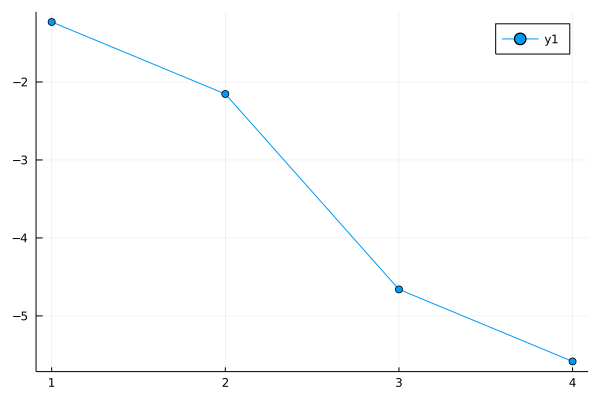

In [39]:
A = [4 3.7
    3.7 3.8]
b = [1;1]
x,i,R = stepesc_descent(A,b,[-1.5,-1.75])
println(A*x-b)
println("x = $x w $i iteracjach. Wartość residuum |Ax-b|= $(norm(A*x-b))")
print(R)
plot(log10.(R),markershape=:circle)

In [40]:
A

2×2 Array{Float64,2}:
 4.0  3.7
 3.7  3.8

In [41]:
function mycg(A,b,x0)
    R = Array{Float64}(undef,0)
    r0 = b - A*x0
    p0 = r0
    k = 0
    pk = p0
    xk = x0
    rk = r0
    
    while (k < 100 && norm(rk) > 1e-6)
        ak = rk'*rk / (pk'*A*pk)
        println("ak = $ak")
        xk = xk + ak*pk
        rk1 = rk - ak*A*pk
        bk = rk1'*rk1 / (rk'*rk)
        pk = rk1 + bk*pk
        println("pk = $pk")
        rk = rk1
        push!(R, norm(rk))
        k += 1
    end
    
    return xk,k, R
end

mycg (generic function with 1 method)

Wartości własne: Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}([-14.761225753550267, -5.256695406687572, -4.082078839762153], [-0.6394206433742211 0.6853099831591123 0.3485562620429514; -0.7377002945250551 -0.4190956217863884 -0.5292987202489037; -0.21665529369148578 -0.5955745854063434 0.7735317685354093])
b = [-14.7, -16.8, -8.0]
ak = -0.0831787381546788
pk = [-3.5189010644498127, 8.096206962795877, -8.230258297863474]
ak = -0.19918564447155568
pk = [0.15096866093003558, -0.08556488320623999, -0.15634010897526238]
ak = -0.19055178158119634
pk = [-2.581268532253451e-15, -2.3592239273284793e-15, -1.2212453270877114e-15]
[0.0, 3.552713678800501e-15, 0.0]
x = [1.0000000000000002, 0.9999999999999997, 1.0000000000000002] w 3 iteracjach. Wartość residuum |Ax-b|= 3.552713678800501e-15
[11.253136354397032, 0.23351253989918522, 3.704095695823026e-15]

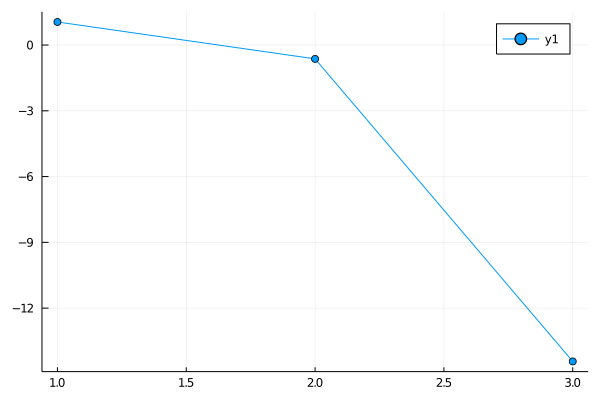

In [42]:
A = [1 -4.7 -1
    -4.7 -0.1 -2
    -1 -2 5]
A = A - 10*I
println("Wartości własne: $(eigen(A))")
x = [1;1;1]
b = A*x
println("b = $b")
x,i,R = mycg(A, b, [-1.5;1.75;-2])
println(A*x-b)
println("x = $x w $i iteracjach. Wartość residuum |Ax-b|= $(norm(A*x-b))")
print(R)
plot(log10.(R),markershape=:circle)

In [43]:
x = [-1;-1;-1]
x'*A*x

-39.5

In [44]:
A = [10 -4.7 -10
    -4.7 3.8 -2
    -10 -2 20]
A = A -30*I
print(A)
eigen(A)

[-20.0 -4.7 -10.0; -4.7 -26.2 -2.0; -10.0 -2.0 -10.0]

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
3-element Array{Float64,1}:
 -31.250530010020462
 -21.15765926341347
  -3.791810726565998
vectors:
3×3 Array{Float64,2}:
 0.610602   0.586357  -0.532307
 0.70841   -0.704875   0.0361603
 0.354007   0.399171   0.845779

In [45]:
A = [1 -4.7 -1
    -4.7 -0.1 -2
    -1 -2 5]
x = [1;1;1]
b = A*x
println("b = $b")
x = [-1.5;1.75;-2]
println(A*x)
println(b -A*x)
r0=b -A*x
p0=r0
x0=x
println("r0 = $r0")
println("r0^T*r0 = $(r0'*r0)")
println("A*r0 = $(A*r0)")
println("r0^TA*r0 = $(r0'*A*r0)")
println("r0^T*r0/r0^TA*r0 = $(r0'*r0/(r0'*A*r0))")
a0 = r0'*r0/(r0'*A*r0)
x1 = x0 + a0*p0
println("x1 = $x1")
println("A*p0 = $(A*p0)")
r1 = r0 - a0*A*p0
println("r1 = $r1")
println("r1'*r1=$(r1'*r1)")
println("r0'*r0=$(r0'*r0)")
beta=r1'*r1 / (r0'*r0)
println("beta=$(r1'*r1 / (r0'*r0))")
println("p1=$(r1 + beta*p0)")
p1 = r1 + beta*p0
println("r1'*r1 = $(r1'*r1)")
println("A*p1=$(A*p1)")
println("p1'*A*p1=$(p1'*A*p1)")
a1 = r1'*r1 / (p1'*A*p1)
println("a1=$a1")
x2 = x1 + a1*p1
println("x2=$x2")
println("b-Ax2 = $(b-A*x2)")
println("norm(b-Ax2) = $(norm(b-A*x2))")

b = [-4.7, -6.8, 2.0]
[-7.725, 10.875, -12.0]
[3.0249999999999995, -17.675, 14.0]
r0 = [3.0249999999999995, -17.675, 14.0]
r0^T*r0 = 517.5562500000001
A*r0 = [72.09750000000001, -40.449999999999996, 102.325]
r0^TA*r0 = 2365.5986875
r0^T*r0/r0^TA*r0 = 0.21878446785365835
x1 = [-0.8381769847426837, -2.1170154693134116, 1.0629825499512169]
A*p0 = [72.09750000000001, -40.449999999999996, 102.325]
r1 = [-12.748813171079135, -8.82516827531952, -8.38712067312559]
r1'*r1=310.7596255443576
r0'*r0=517.5562500000001
beta=0.6004364270441281
p1=[-10.932492979270648, -19.437882123324485, 0.018989305492203457]
r1'*r1 = 310.7596255443576
A*p1=[80.40656369486224, 53.28852660392009, 49.90320375338064]
p1'*A*p1=-1913.9126645528866
a1=-0.16236875971399398
x2=[0.9369183408834385, 1.0390893425176007, 1.0598992799706177]
b-Ax2 = [0.30670084891990257, -0.1727763036548433, -0.28439937393444925]
norm(b-Ax2) = 0.4525484125782856


In [46]:

A = [1 -4.7 -1
    -4.7 -0.1 -2
    -1 -2 5]
x = [1;1;1]
b = A*x

x = [-1.5;1.75;-2]
x,i,R = mycg(A,b,x)

ak = 0.21878446785365835
pk = [-10.932492979270648, -19.437882123324485, 0.018989305492203457]
ak = -0.16236875971399398
pk = [0.2994960028051781, -0.18558646047453753, -0.284386859403302]
ak = 0.21062604684442257
pk = [-4.996003610813005e-16, -3.1363800445660795e-15, 1.887379141862747e-15]


([0.9999999999999992, 1.0000000000000002, 0.9999999999999997], 3, [17.628375578718465, 0.45254841257828354, 3.694412041162093e-15])